# Import package and load data

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer

sns.set_style("ticks", rc={"xtick.direction":"in", "ytick.direction":"in"})
%matplotlib inline

In [2]:
df_adult = pd.read_csv('adult.csv.zip')

In [3]:
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_adult.shape

(48842, 15)

# Data Cleaning

In [6]:
df_adult.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [7]:
df_adult.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [8]:
df_adult['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

> There are "?" data in `workclass`, `occupation`, and `native-country` features, which will be considered as Null values

In [9]:
''' replace ? to np.nan '''
df_adult.loc[ df_adult.workclass=='?', 'workclass'] = np.nan
df_adult.loc[ df_adult.occupation=='?', 'occupation'] = np.nan
df_adult.loc[ df_adult['native-country']=='?', 'native-country'] = np.nan

In [10]:
''' check whether null values are shown '''
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
''' Impute the null values into the most frequent values for each feature '''

imputer = SimpleImputer(strategy='most_frequent')

df_adult.workclass  = imputer.fit_transform(df_adult[['workclass']])
df_adult.occupation = imputer.fit_transform(df_adult[['occupation']])
df_adult['native-country'] = imputer.fit_transform(df_adult[['native-country']])

In [12]:
''' check the imputation '''
df_adult.occupation.value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df_adult.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
df_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [84]:
df_adult_num = df_adult.drop(["educational-num","income"], axis=1)

# Explore the Data

## Histograms

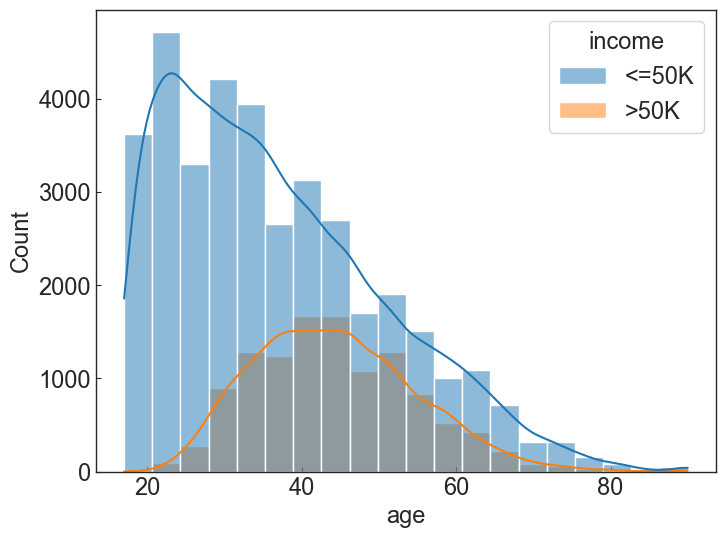

In [104]:
sns.histplot(x='age', data=df_adult, hue='income', bins=20, kde=True);

> - "age" attribute is not symmetric.
> - it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
> - Minimum and Maximum age of the people is 17 and 90 respectively.
> - This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

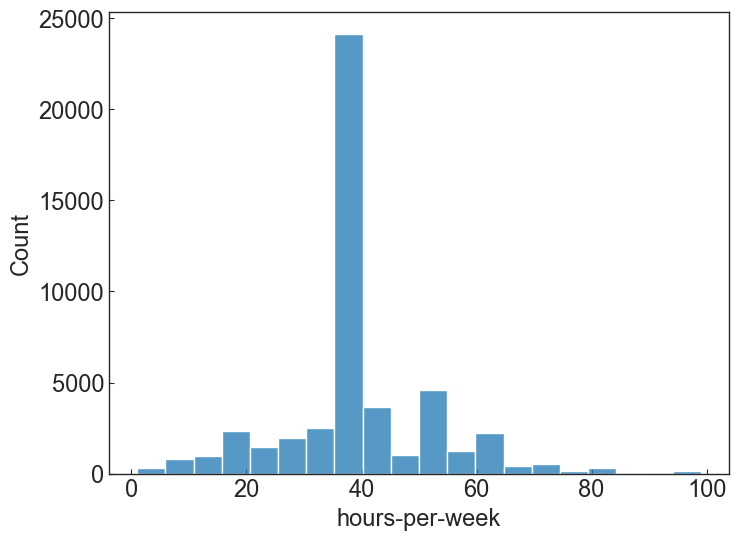

In [29]:
sns.histplot(x='hours-per-week', data=df_adult, bins=20);

> - In this data the hours per week atrribute varies within the range of 1 to 99.
> - Most people work 30-40 hours per week, they are roughly 27,000 people.
> - There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
> - 75 percentage of the people spend 45 or less working hours per week.

## Countplots 

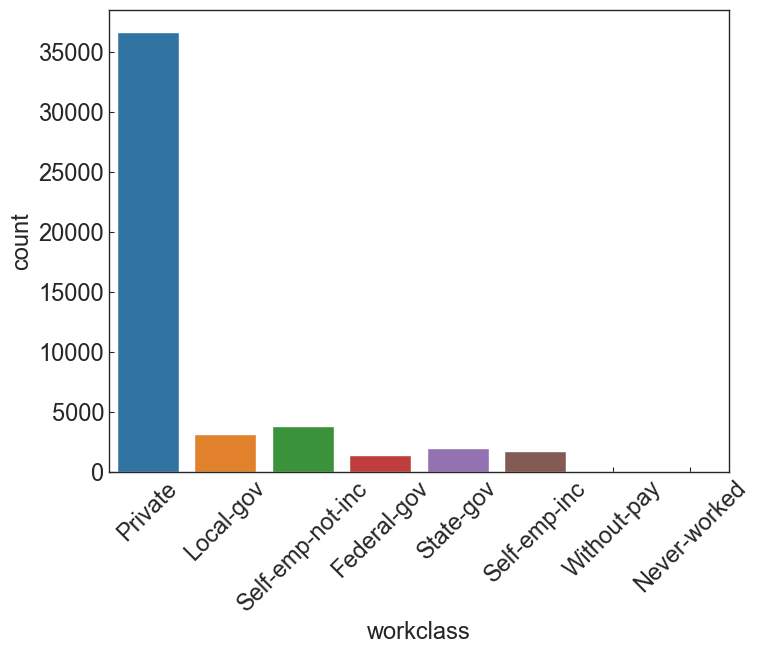

In [34]:
#plt.figure(figsize=(12,8))

#total = float(len(df_adult["income"]) )

ax = sns.countplot(x="workclass", data=df_adult)
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 3,
#            '{:1.2f}'.format((height/total)*100),
#            ha="center") 
#plt.show()

ax.tick_params(axis='x', labelrotation=45)

> - There are 8 unique categories present in the worclass attribute.
> - Most of them belong to the private workclass(36705) i.e. 75.15%.
> - without-pay and never-worked has minimum count in workclass attribute(less than 1%).
> - There is huge imbalance in the categories of workclass attribute.

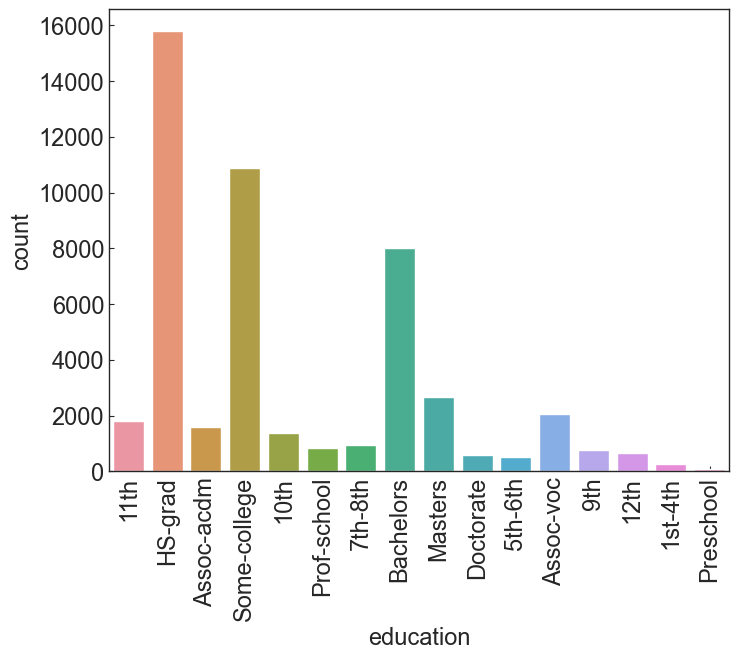

In [37]:
ax = sns.countplot(x="education", data=df_adult)
ax.tick_params(axis='x', labelrotation=90)

> - There are 16 unique categories present in the education attribute.
> - Hs-grad has 32.32% of all the education attribute.
> - HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
> - Pre-school has minimum samples i.e. 83.

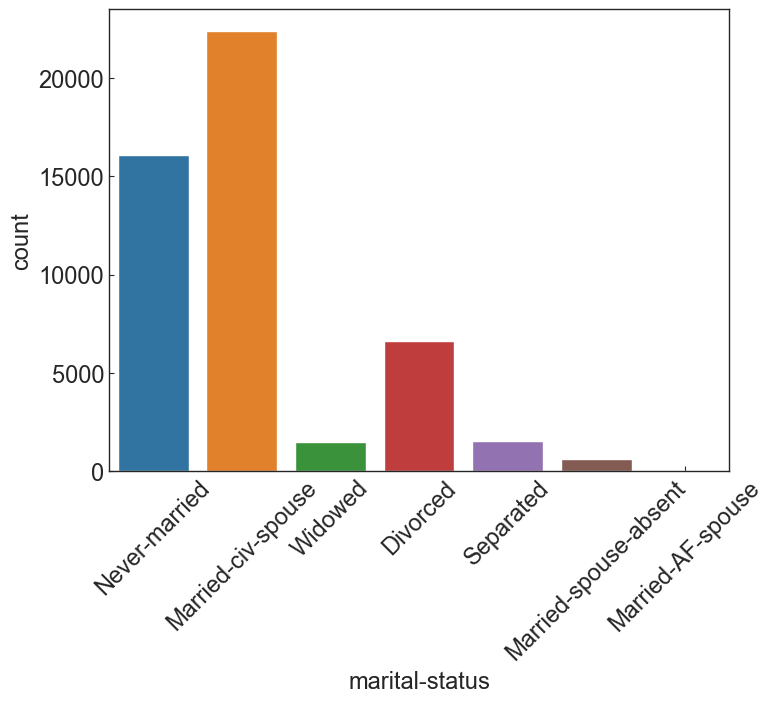

In [39]:
ax = sns.countplot(x="marital-status", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - This marital-status attribute has 7 unique categories.
> - Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
> - Married-civ-spouse has maximum number of samples.
> - Married-AF-spouse has minimum number of obs.

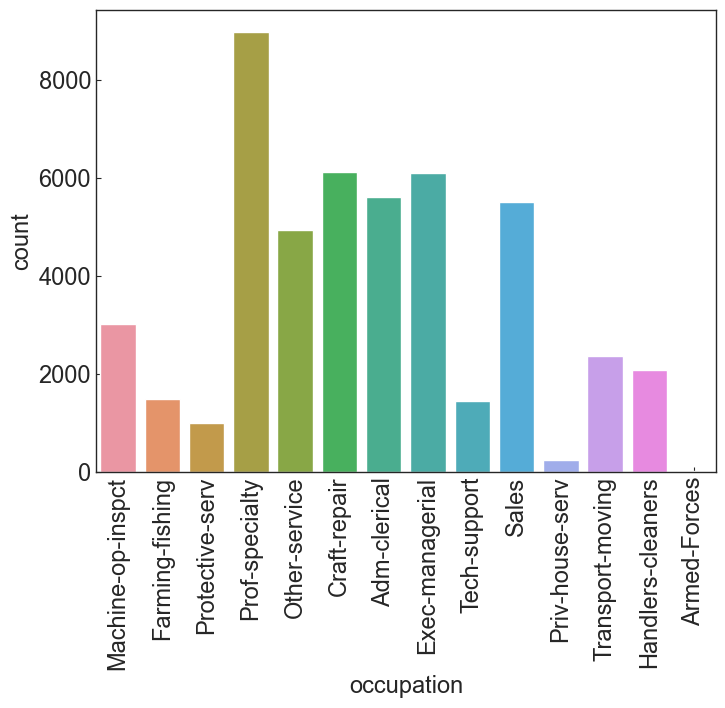

In [43]:
ax = sns.countplot(x="occupation", data=df_adult)
ax.tick_params(axis='x', labelrotation=90)

> - There are 14 unique categories present in the occupation attribute.
> - Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
> - Armed-Forces has minimum samples in the occupation attribute.

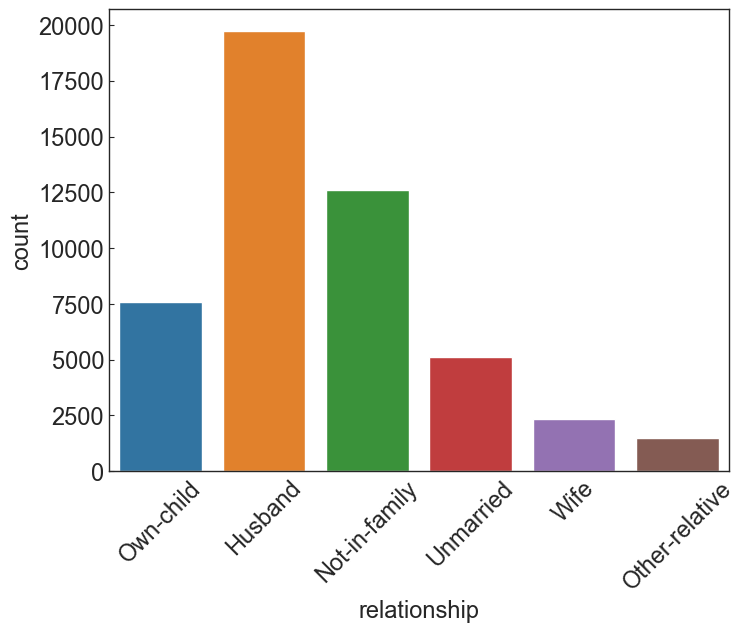

In [45]:
ax = sns.countplot(x="relationship", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - There are 6 unique categories in the relationship attribute.
> - Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

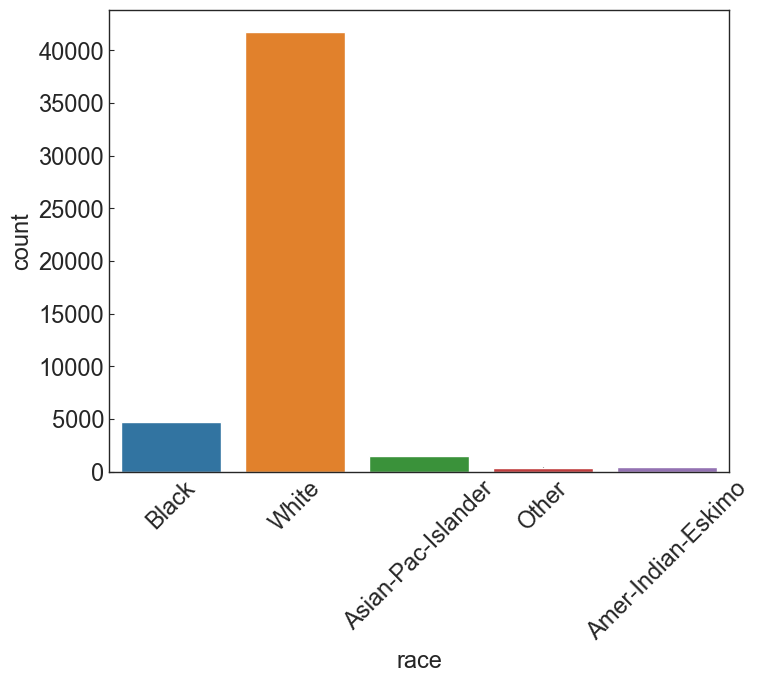

In [47]:
ax = sns.countplot(x="race", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - There are 5 unique categories in the race attribute.
> - Most of them are "white" which is roughly 85.50%.
> - This dataset is totally bias toward the "white" race.
> - Second major race in the dataset is the "black" with just 9.59%.

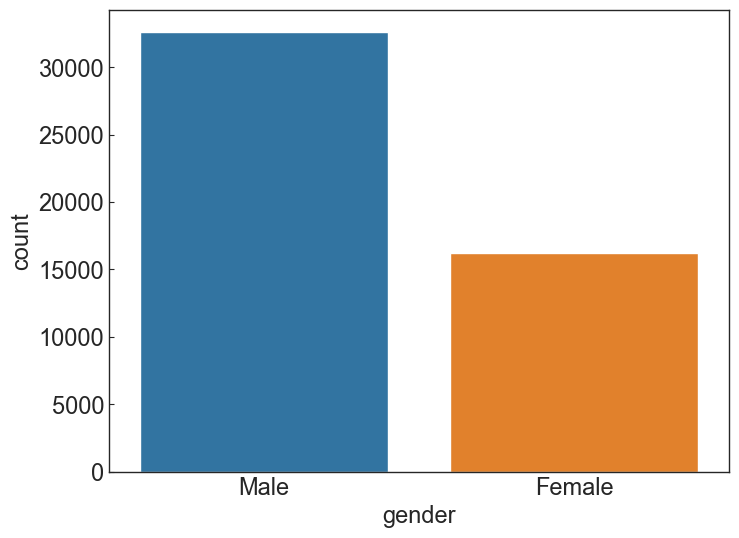

In [49]:
ax = sns.countplot(x="gender", data=df_adult)
#ax.tick_params(axis='x', labelrotation=45)

> - Gender has 2 unique categories(male and female).
> - But the frequency of male(32650) is higher than the female(16192) categories.
> - Distribution shows that this dataset is skewed toward the male with nearly 67%.

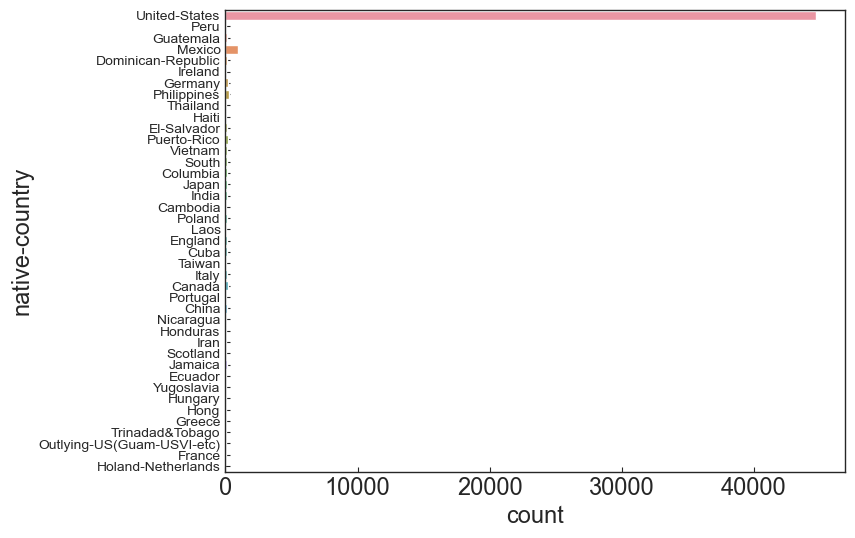

In [56]:
ax = sns.countplot(y="native-country", data=df_adult)
ax.tick_params(axis='y', labelsize=10)

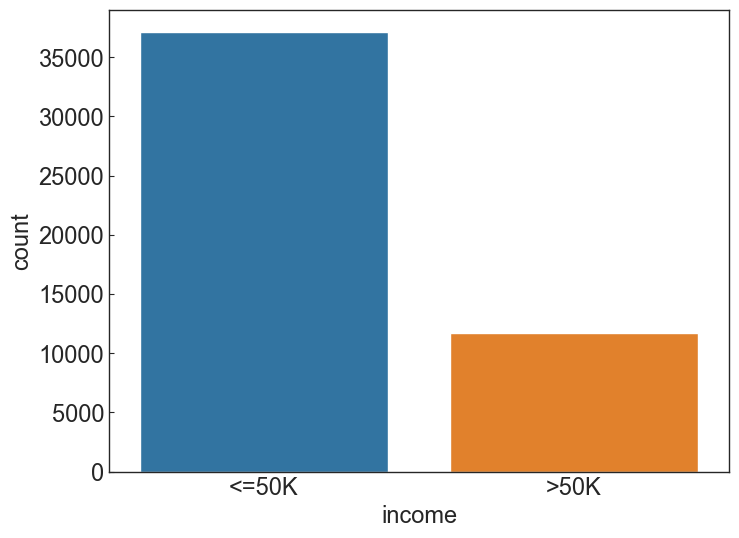

In [57]:
''' target variable '''

ax = sns.countplot(x="income", data=df_adult)

> - This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

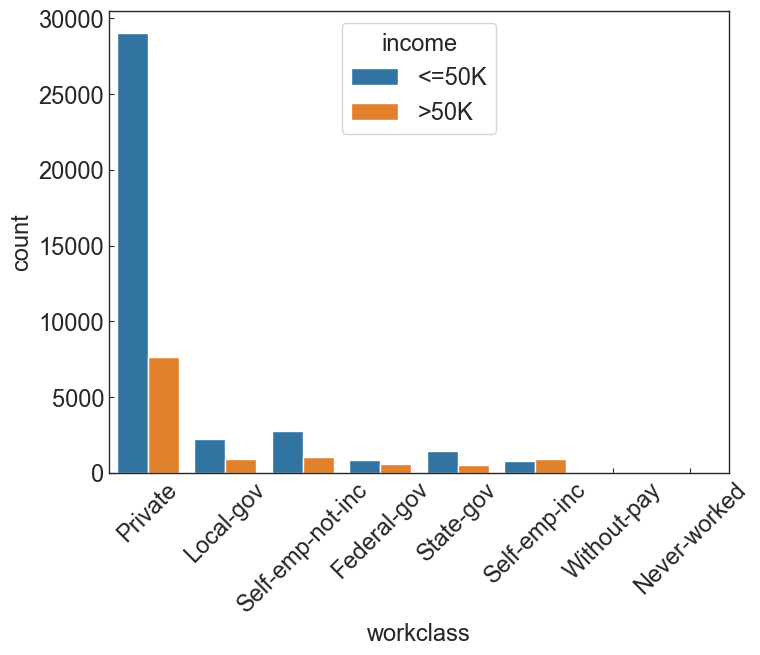

In [65]:
ax = sns.countplot(x="workclass", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - There are 8 unique categories present in the worclass attribute.
> - Most of them belong to the private workclass(36705) i.e. 75.15%.
> - without-pay and never-worked has minimum count in workclass attribute(less than 1%).
> - There is huge imbalance in the categories of workclass attribute.

> - In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).
> - self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
> - In Federal-gov workclass nearly more than half of the people earn >50k.

In [68]:
# contingency table
c_t = pd.crosstab(df_adult['workclass'].sample(frac=0.002, replace=True, random_state=1), \
                  df_adult['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
workclass,,
Federal-gov,2,1
Local-gov,6,1
Private,54,21
Self-emp-inc,2,1
Self-emp-not-inc,4,3
State-gov,3,0


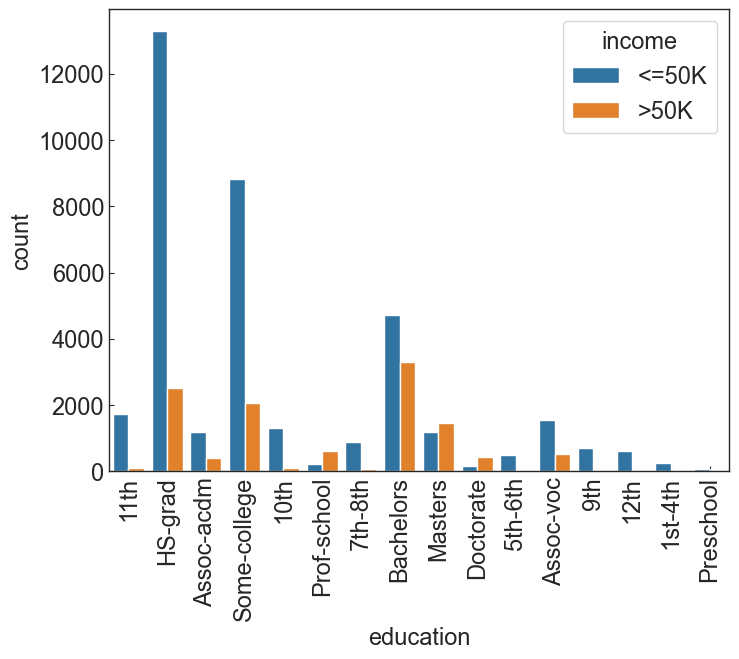

In [71]:
ax = sns.countplot(x="education", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=90)

> - Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
> - There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
> - These are prof-school, masters and doctorate.
> - We can also infer that higher eduction may provide better earnings.

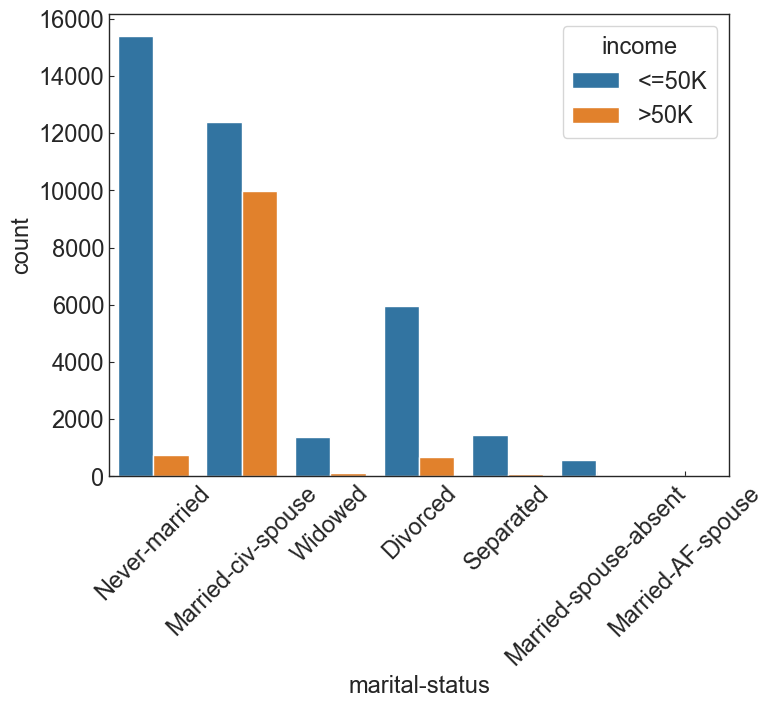

In [74]:
ax = sns.countplot(x="marital-status", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
> - Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
> - Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

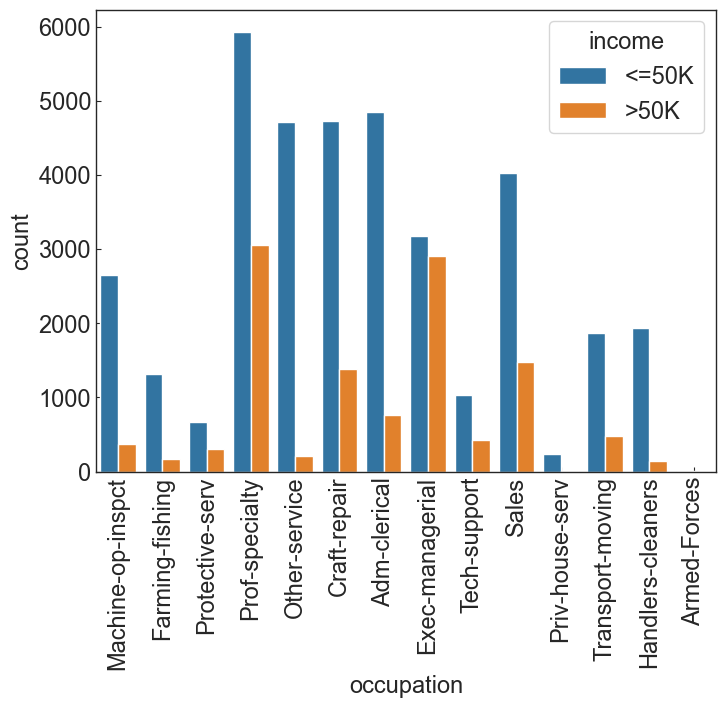

In [76]:
ax = sns.countplot(x="occupation", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=90)

> - Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
> - There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

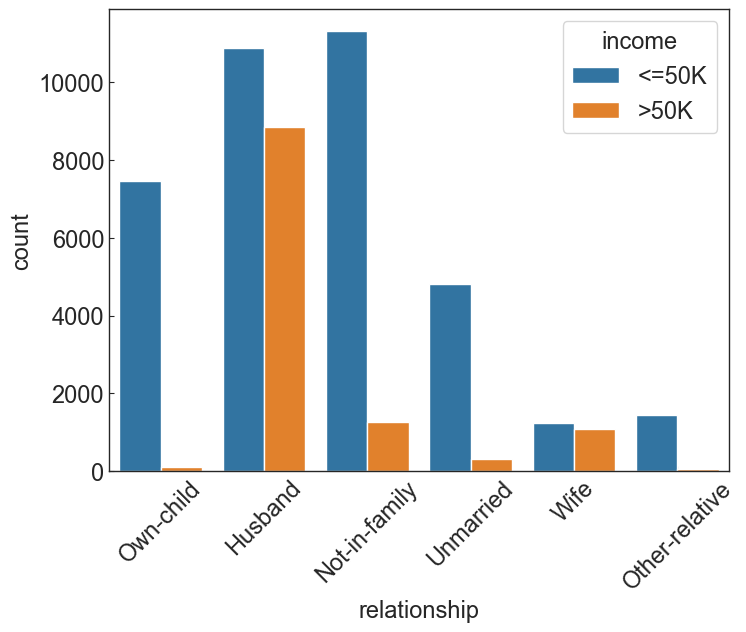

In [78]:
ax = sns.countplot(x="relationship", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
> - One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
> - "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
> - There is huge difference between the percentage of fall either groups except for "husband" and "wife".

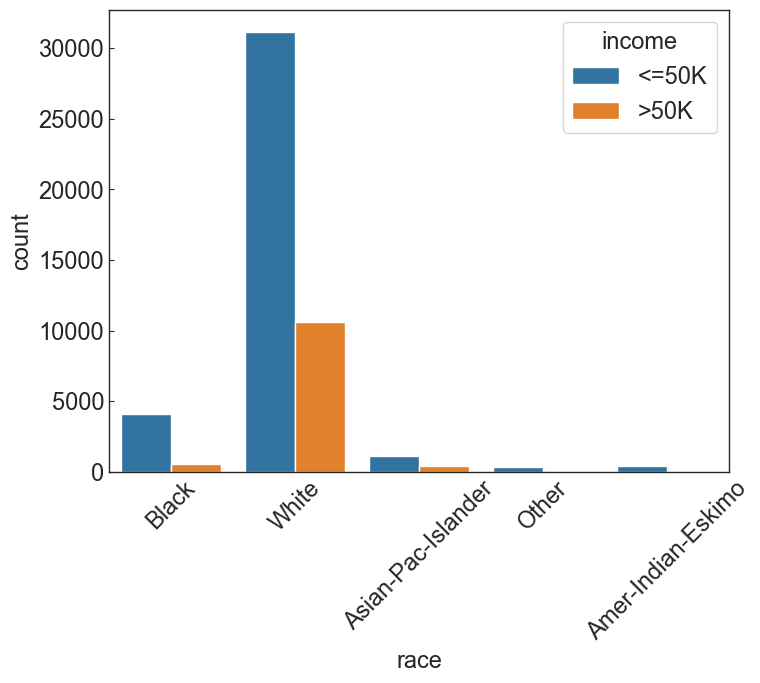

In [80]:
ax = sns.countplot(x="race", hue="income", data=df_adult)
ax.tick_params(axis='x', labelrotation=45)

> - The relationship of "white" race with "income" can easily guess based on previous summary statistics.
> - There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

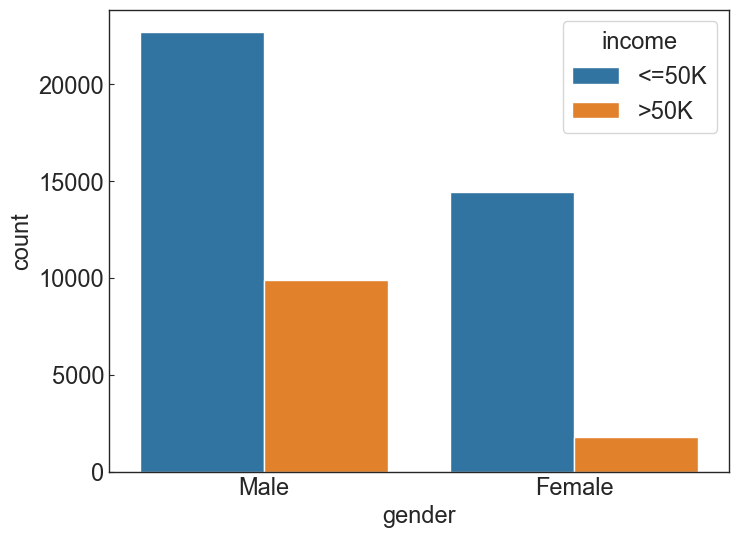

In [82]:
ax = sns.countplot(x="gender", hue="income", data=df_adult)

> - For "female" earning more than 50k is rare with only 3.62% of all observations.
> - But for male, 20.31% of all people earn more than 50k .

## Boxplot

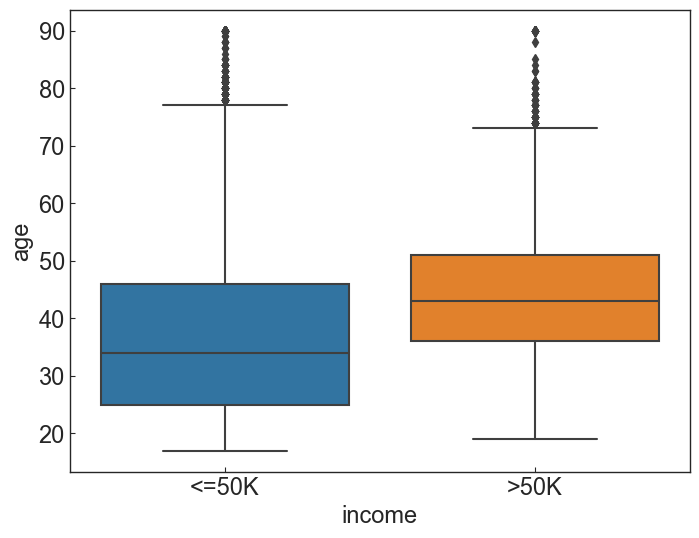

In [59]:
sns.boxplot(x="income", y="age", data=df_adult);

In [61]:
df_adult[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


> - Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
> - Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
> - Interquartile range(IQR) :
>    - For Income group(<=50k) , IQR is between [25,46] (long range)
>        - Middle 50% of the Age is spread over longer range for the income group who earn <=50k.
>    - For Income group(>50k) , IQR is between [38,50] (shorter range)

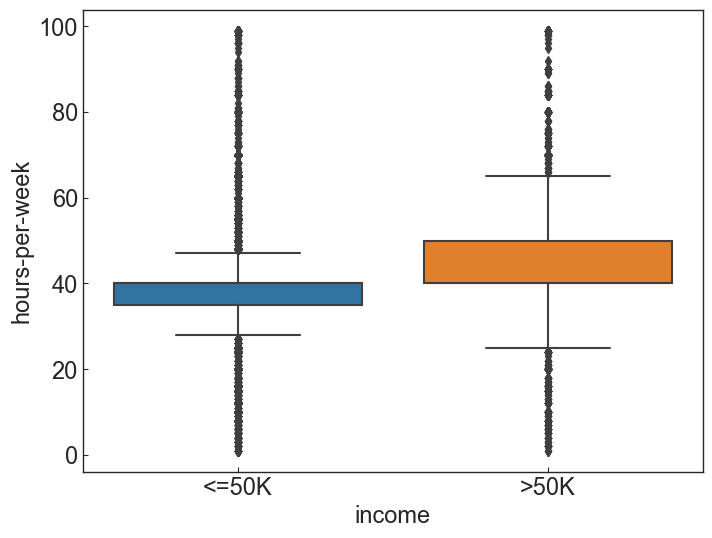

In [63]:
sns.boxplot(x="income", y="hours-per-week", data=df_adult);

> - The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.
>     - Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
>     - Income group who earns <=50k has spend ~37 "hours-per-week".
> - The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.[23,68].
>     - Income group who earns >50k have flexible working hours
> - More Outliers present in the Income group who earns <=50k.

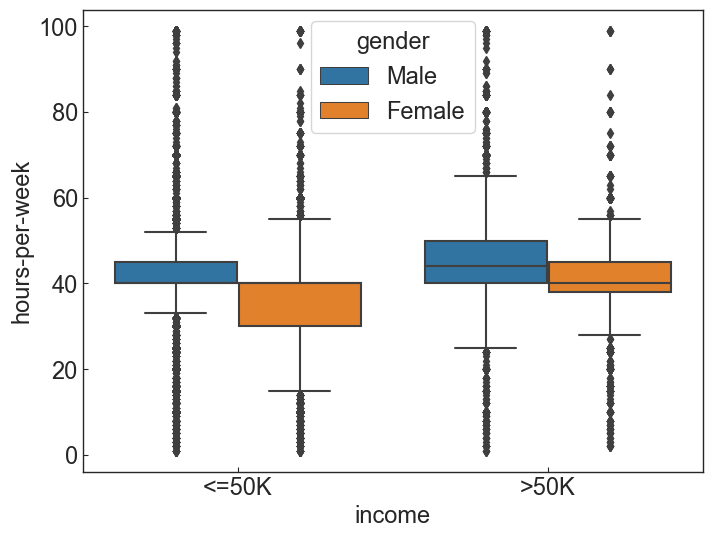

In [93]:
ax = sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df_adult)
#ax.legend(loc='upper right')

> - The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
> - Boxplot range for Income group who earns <=50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
>     - Male [32,52]
>     - Female [17,57]
>     - Females have more flexible working hours per week in the income groups who earns <=50k
> - Boxplot range for Income group who earns >50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
>     - Male [23,63]
>     - Female [30,57]
>     - Males have more flexible working hours per week in the income groups who earns >=50k

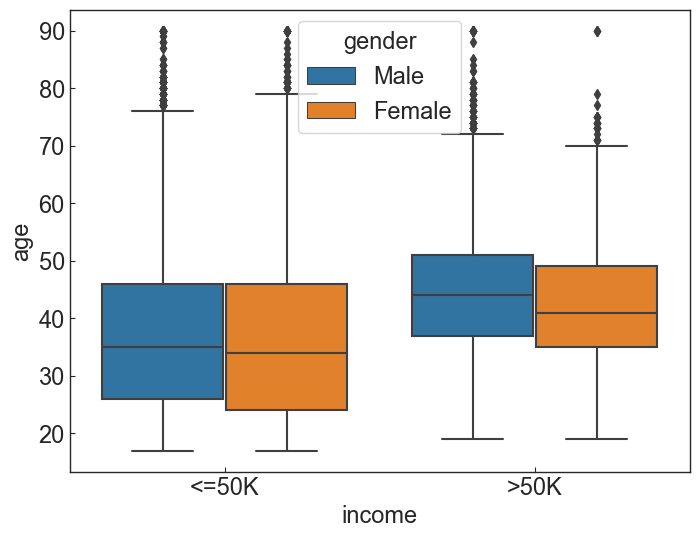

In [96]:
sns.boxplot(x="income", y="age",hue="gender",data=df_adult);

> - Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
> - But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.

## Heatmap

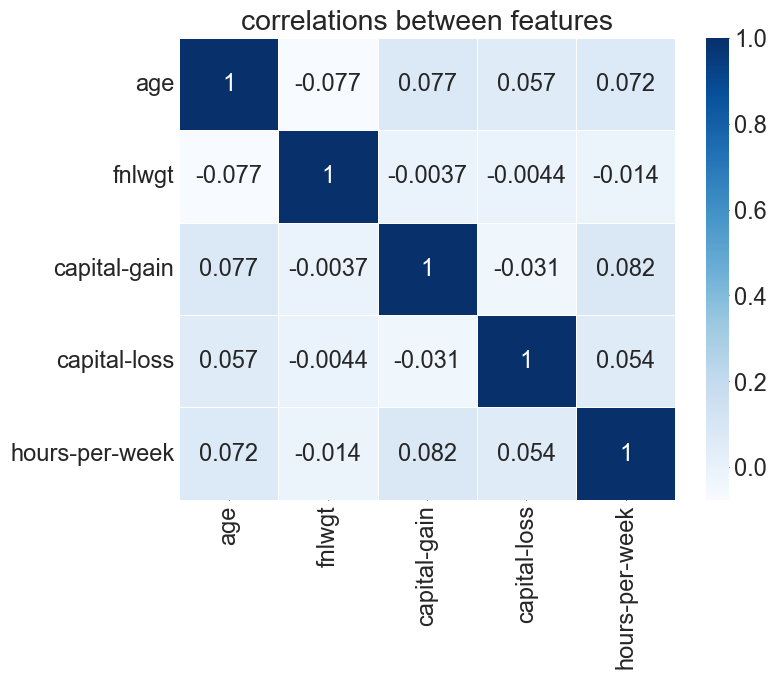

In [88]:
ax = sns.heatmap(df_adult_num.corr(),annot=True,linewidths=.5, cmap="Blues")
ax.set_title('correlations between features');

> - There is no strong correlation among the numeric attributes.
> - There is neither strong positive nor strong negative correlation present in any variable .
> - The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).

# Conclusion

1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.62% of all observations.
   But for male, 20.31% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).